# Classics

Some tools to support classics related subject matter, such as retrieving classical texts and searching throuhg them, analysing grammar, inflectng words (declensions, conjugations).

The intention, as with the other notebooks in this collection, is to explore ways in which we might create educational resources that are "reproducible with modification" through making available the means of production of various analyses, diagrams, etc along with the produced resource.

A secondary benefit is that by automating the generation of particular assets or examples, it becomes easier for authors to make use of them, which may open up new teaching lines. A tertiary benefit is that learners may use the same production methods to allow them to explore the topics themselves. 

## `cltk`

`cltk`, the [ Classical Language Toolkit](https://github.com/cltk/cltk), is a natural language processing (NLP) package designed for use with the languages of Ancient, Classical, and Medieval Eurasia (esp. Greek and Latin). I assume it is based on `nltk`.

A selection of tutorial notebooks can be found at [cltk/tutorials](https://github.com/cltk/tutorials).

`cltk` provides access to a variety of classical texts in a variety of languages, and as such provides a way for learners to access such texts themselves, *if* we can find a way of accessing a reliable index to them, or search through metadata provided for them.

The natural language processing tools in the package make it easy to search texts, as well as analyse them in some languages.

There are also language specific tools, such as a declension generator in Latin, that might be useful for helping check declensions and conjugations, or display particular person/tense combinations for a particular word.

OpenLearn units to explore:

- [Discovering Acient Greek and Latin](http://www.open.edu/openlearn/history-the-arts/discovering-ancient-greek-and-latin/content-section-0?active-tab=description-tab)
- [Getting started on classical Latin](http://www.open.edu/openlearn/history-the-arts/getting-started-on-classical-latin/content-section-0?active-tab=description-tab)
- [Continuing classical Latin](http://www.open.edu/openlearn/history-the-arts/history/classical-studies/continuing-classical-latin/content-section-0?active-tab=description-tab)

In [2]:
%%capture
try:
    import cltk
except:
    !pip install --upgrade matplotlib
    !pip install --upgrade --no-cache-dir git+https://github.com/cltk/cltk.git

In [3]:
#CLTK is the core analysis package in a family of packages that act as data sources
#  for a wide range of classical languages.
# The external packages include language models and corpus collections
#stores all data in the local directory cltk_data,
#CLTK create a data directory in a user’s root directory upon first initialization 
#of the CorpusImporter() class into which data collections are downloaded.
from cltk.corpus.utils.importer import CorpusImporter

CorpusImporter('greek').list_corpora 

['greek_software_tlgu',
 'greek_text_perseus',
 'phi7',
 'tlg',
 'greek_proper_names_cltk',
 'greek_models_cltk',
 'greek_treebank_perseus',
 'greek_lexica_perseus',
 'greek_training_set_sentence_cltk',
 'greek_word2vec_cltk',
 'greek_text_lacus_curtius',
 'greek_text_first1kgreek']

In [4]:
CorpusImporter('latin').list_corpora

['latin_text_perseus',
 'latin_treebank_perseus',
 'latin_text_latin_library',
 'phi5',
 'phi7',
 'latin_proper_names_cltk',
 'latin_models_cltk',
 'latin_pos_lemmata_cltk',
 'latin_treebank_index_thomisticus',
 'latin_lexica_perseus',
 'latin_training_set_sentence_cltk',
 'latin_word2vec_cltk',
 'latin_text_antique_digiliblt',
 'latin_text_corpus_grammaticorum_latinorum',
 'latin_text_poeti_ditalia']

In [5]:
CorpusImporter('tibetan').list_corpora
#old_english, hebrew, arabic, sanskrit, begali, chinese, coptic, hindi, old_norse,
#punjabi, tibetan, latin, greek

['tibetan_pos_tdc', 'tibetan_lexica_tdc']

In [6]:
from cltk.corpus.utils.importer import CorpusImporter

#on first run, this imports to ~/cltk_data/latin/latin_text_latin_library
CorpusImporter('latin').import_corpus('latin_text_latin_library')

#We also need access to tokenizers/punkt/PY3/english.pickle
# to extract sentences, tokens etc
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/nbuser/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
!ls ~/cltk_data/latin/text/latin_text_latin_library/vergil

aen10.txt  aen2.txt  aen6.txt  ec10.txt  ec4.txt  ec8.txt   geo3.txt
aen11.txt  aen3.txt  aen7.txt  ec1.txt	 ec5.txt  ec9.txt   geo4.txt
aen12.txt  aen4.txt  aen8.txt  ec2.txt	 ec6.txt  geo1.txt
aen1.txt   aen5.txt  aen9.txt  ec3.txt	 ec7.txt  geo2.txt


We can now work with this corpus (even though we don't really know what's in it? *Is there an index somewhere? How do folk find what file they want, or how do they even know what's available? Original website form which library files are taken is presumably [The Latin Library](http://thelatinlibrary.com/)?).

In [8]:
from cltk.corpus import latin
from os.path import expanduser

#We need to get tthe absolute path to the installed files
c= latin.PlaintextCorpusReader(expanduser('~/cltk_data/latin/text/latin_text_latin_library'),
                               '.*\.txt')


In [13]:
#Access the raw text
print(c.raw()[1015:1100])



 
 TABULA III 
 

 
Aeris confessi rebusque iure iudicatis
XXX dies iusti sunto. 




In [14]:
#Extract individual sentences
c.sents()[10]

['Proletario', 'iam', 'civi', 'quis', 'volet', 'vindex', 'esto', '.']

In [15]:
#Load in a single file from the corpus
#I'm not sure how to get the path to the specific file without the leading .*/?

aen_c= latin.PlaintextCorpusReader(expanduser('~/cltk_data/latin/text/latin_text_latin_library'),
                               '.*/aen.*\.txt')
len(aen_c.sents())

#if we load in '.*/aen.*\.txt' what order are then in?
#Does sort give aen11.txt before aen1.txt?
aen_c.sents()[10]==c.sents()[10]


False

In [16]:
#Get a single file
aen1= latin.PlaintextCorpusReader(expanduser('~/cltk_data/latin/text/latin_text_latin_library'),
                               '.*/aen1.txt')
print(aen1.raw()[1000:1200])


Tyrias olim quae verteret arces;    20 
hinc populum late regem belloque superbum 
venturum excidio Libyae: sic volvere Parcas. 
Id metuens, veterisque memor Saturnia belli, 
prima quod ad Troiam pro 


In [17]:
#From the repo it looks like there is one local corpus
#https://github.com/cltk/cltk/blob/master/cltk/corpus/latin
#with an index:
#https://github.com/cltk/cltk/blob/master/cltk/corpus/latin/phi5_index.py

import cltk.corpus.latin.phi5_index as phi
#phi.PHI5_INDEX
#phi.PHI5_WORKS_INDEX

In [18]:
{k:v for k,v in phi.PHI5_WORKS_INDEX.items() if 'Catullus' in v['name']}

{'LAT0472': {'name': 'Gaius Valerius Catullus', 'works': ['001', '002']}}

In [19]:
#borked?
#CorpusImporter('latin').import_corpus('phi5')

### Looking at the texts

In [20]:
#https://github.com/cltk/tutorials/blob/master/9%20Lexical%20Dispersion%20Plot.ipynb
import cltk
from nltk.tokenize import word_tokenize 
from cltk.tokenize.word import WordTokenizer
import matplotlib.pyplot as plt

In [21]:
def dispersionPlot(text, words, lang):
    languages = ["en","bn","hi","la","sa"]
    """
    en:English
    bn:Bengali
    hi:Hindi
    la:Latin
    sa:Sanskrit
    """
    if lang in languages:
        if lang in ["en","la"]:
            tokens = word_tokenize(text.lower())
            for i in range(0,len(words)):
                words[i] = words[i].lower()
        if lang in ["bn","hi","sa"]:
            tokens= i_word(text)
    
    # Locating the matches of the words in the text.    
        x_length = len(tokens)
        y_length = len(words)
        x_list = []
        y_list = []
        for i in range(0,x_length):
            for j in range(0,y_length):
                if tokens[i]==words[j]:
                    x_list.append(i+1)
                    y_list.append(j)
    
    #Creation of Dispersion Plot with Matplotlib's pyplot.         
        plt.plot(x_list, y_list, "b|", scalex=.1)
        plt.yticks(list(range(len(words))), words, color="b")
        plt.ylim(-1, len(words))
        plt.xlabel("Lexical Distribution")
        plt.show()
            
    else:
        print("Language not presently covered by CLTK or wrong language code")

Sometimes it can be useful to look at the distribution of a particular word, or set of words, through a text. A *dispersion plot* reveals this distribution.

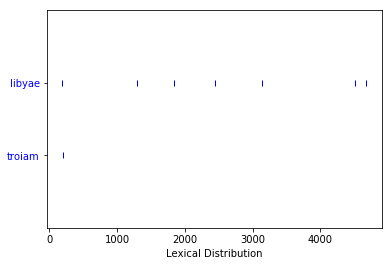

In [22]:
words = ["Troiam","Libyae"]
dispersionPlot(aen1.raw(), words, "la")

Let's see if the `.concordance()` method from `nltk` is available:

In [23]:
#Here's a manual way of doing a concordance, tjough we need to clean it for the tokeniser?
from cltk.corpus.utils.formatter import remove_non_ascii
from cltk.corpus.utils.formatter import remove_non_latin

aen1_clean = remove_non_ascii(aen1.raw())
aen1_clean = remove_non_latin(aen1_clean)
#print(aen1_clean[:1000])

from cltk.tokenize.word import WordTokenizer
from nltk.text import Text

word_tokenizer = WordTokenizer('latin')

tokens = word_tokenizer.tokenize(aen1_clean)
textList = Text(tokens)
textList.concordance('Libyae')

Displaying 7 of 7 matches:
ello -que superbum venturum excidio Libyae sic volvere Parcas Id metuens veter
a litora cursu contendunt petere et Libyae vertuntur ad oras Est in secessu lo
ulos sic vertice caeli constitit et Libyae defixit lumina regnis Atque illum t
e per aera magnum remigio alarum ac Libyae citus adstitit oris Et iam iussa fa
o -que supersunt Ipse ignotus egens Libyae deserta peragro Europa atque Asia p
e pater optime Teucrum pontus habet Libyae nec spes iam restat Iuli at freta S
uidem per litora certos dimittam et Libyae lustrare extrema iubebo si quibus e


In [26]:
#A better way is to take the tokenised version of the words from the corpus
Text(aen1.words()).concordance('Libyae')

Displaying 7 of 7 matches:
 belloque superbum venturum excidio Libyae : sic volvere Parcas . Id metuens ,
tora , cursu contendunt petere , et Libyae vertuntur ad oras . Est in secessu 
ic vertice caeli 225 constitit , et Libyae defixit lumina regnis . Atque illum
aera magnum 300 remigio alarum , ac Libyae citus adstitit oris . Et iam iussa 
 supersunt . Ipse ignotus , egens , Libyae deserta peragro , Europa atque Asia
r optime Teucrum , 555 pontus habet Libyae , nec spes iam restat Iuli , at fre
uidem per litora certos dimittam et Libyae lustrare extrema iubebo , si quibus


Being able to search a text is really useful.

In [27]:
from cltk.ir.query import match_regex

#Sentence context
matches = match_regex(aen1.raw(), r'Libyae', language='latin',
                      context='sentence', case_insensitive=True)

for match in matches:
    print(match,'\n---\n')


Progeniem sed enim Troiano a sanguine duci 
audierat, Tyrias olim quae verteret arces;    20 
hinc populum late regem belloque superbum 
venturum excidio *Libyae*: sic volvere Parcas. 
---

 

 
Defessi Aeneadae, quae proxima litora, cursu 
contendunt petere, et *Libyae* vertuntur ad oras. 
---

 

 
Et iam finis erat, cum Iuppiter aethere summo 
despiciens mare velivolum terrasque iacentis 
litoraque et latos populos, sic vertice caeli    225 
constitit, et *Libyae* defixit lumina regnis. 
---


 

 
Haec ait, et Maia genitum demittit ab alto, 
ut terrae, utque novae pateant Karthaginis arces 
hospitio Teucris, ne fati nescia Dido 
finibus arceret: volat ille per aera magnum    300 
remigio alarum, ac *Libyae* citus adstitit oris. 
---


Ipse ignotus, egens, *Libyae* deserta peragro, 
Europa atque Asia pulsus. 
---

   550 
Quassatam ventis liceat subducere classem, 
et silvis aptare trabes et stringere remos: 
si datur Italiam, sociis et rege recepto, 
tendere, ut Italiam laeti Lati

In [28]:
#10 characters either way context
matches = match_regex(aen1.raw(), r'Libyae', language='latin',
                      context=10, case_insensitive=True)

for match in matches:
    print(match)

m excidio *Libyae*: sic volv
etere, et *Libyae* vertuntur
titit, et *Libyae* defixit l
larum, ac *Libyae* citus ads
s, egens, *Libyae* deserta p
tus habet *Libyae*, nec spes
mittam et *Libyae* lustrare 


### Named entities

The named entity recognition is a but ropey, but it's a start?

In [29]:
from cltk.tag import ner
from cltk.stem.latin.j_v import JVReplacer


jv_replacer = JVReplacer()

text_str_iu = jv_replacer.replace(aen1.raw())

tagged = ner.tag_ner('latin', input_text=text_str_iu, output_type=list)

In [30]:
[w for w,_ in set([w for w in tagged if 'Entity' in w])][:10]

['Tyrias',
 'Regius',
 'Pariusue',
 'Tiberinaque',
 'Seu',
 'Aiacis',
 'Notus',
 'Pergama',
 'Lucus',
 'Cymothoe']

### Declensions

Find the inflection (declension / conjugation) of a given word / lemma.

(*Lemma* - "the canonical form of an inflected word".)

In [31]:
from cltk.stem.latin.declension import CollatinusDecliner

CorpusImporter('latin').import_corpus('latin_models_cltk')

The morphological character of a word is encoded using a nine character code string (- is used as the null character):

 	1: 	part of speech
 		n	noun
 		v	verb
 		t	participle
 		a	adjective
 		d	adverb
 		c	conjunction
 		r	preposition
 		p	pronoun
 		m	numeral
 		i	interjection
 		e	exclamation
 		u	punctuation
 	2: 	person
 		1	first person
 		2	second person
 		3	third person
 	3: 	number
 		s	singular
 		p	plural
 	4: 	tense
 		p	present
 		i	imperfect
 		r	perfect
 		l	pluperfect
 		t	future perfect
 		f	future
 	5: 	mood
 		i	indicative
 		s	subjunctive
 		n	infinitive
 		m	imperative
 		p	participle
 		d	gerund
 		g	gerundive
 		u	supine
 	6: 	voice
 		a	active
 		p	passive
 	7:	gender
 		m	masculine
 		f	feminine
 		n	neuter
 	8: 	case
 		n	nominative
 		g	genitive
 		d	dative
 		a	accusative
 		b	ablative
 		v	vocative
 		l	locative
 	9: 	degree
 		c	comparative
 		s	superlative
 
Via: https://github.com/cltk/latin_treebank_perseus#readme

In [32]:
decliner = CollatinusDecliner()

decliner.decline("amo")[:20]

[('amo', 'v1spia---'),
 ('amas', 'v2spia---'),
 ('amat', 'v3spia---'),
 ('amamus', 'v1ppia---'),
 ('amatis', 'v2ppia---'),
 ('amant', 'v3ppia---'),
 ('amabam', 'v1siia---'),
 ('amabas', 'v2siia---'),
 ('amabat', 'v3siia---'),
 ('amabamus', 'v1piia---'),
 ('amabatis', 'v2piia---'),
 ('amabant', 'v3piia---'),
 ('amabo', 'v1sfia---'),
 ('amabis', 'v2sfia---'),
 ('amabit', 'v3sfia---'),
 ('amabimus', 'v1pfia---'),
 ('amabitis', 'v2pfia---'),
 ('amabunt', 'v3pfia---'),
 ('amavi', 'v1sria---'),
 ('amavisti', 'v2sria---')]

We can decode the strings to more easily describe the morphological character of a word.

In [35]:
#Taken from https://github.com/alpheios-project/pyperseus-treebank/blob/master/pyperseus_treebank/latin.py#L44#
#Maybe use https://github.com/jazzband/inflect for natural language code2text description?
import re

# Conversion table for CONLL
# Thanks to @epageperron
#??Some divergence from README?
_CONLL_LA_CONV_DICT = { "a": "adjective", "c": "conjunction",
                        "d": "adverb", "e": "exclamation", "g": "PART",
                        "i": "interjection", "l": "DET",
                        "m": "numeral", "n": "noun","p": "pronoun",
                        "r": "preposition", "t": "VERB", "u": "punctuation",
                        "v": "verb", "x": "X" }

_NUMBER = {"s": "singular", "p": "plural"}
_TENSE = {"p": "present", "f": "future", "r": "perfect", "l": "pluperfect",
          "i": "imperfect", "t": "future perfect"}
_MOOD = {"i": "indicative", "s": "subjunctive", "m": "imperative", 'd':'gerund',
         "g": "gerundive", "p": "participle", "u": "supine", "n": "infinitive"}
_VOICE = {"a": "active", "p": "passive", "d": "Dep"}
_GENDER = {"f": "feminine", "m": "masculine", "n": "neuter", "c": "Com"}
_CASE = {"g": "genitive", "d": "dative", "a": "accusative", "v": "vocative",
         "n": "nominative", "b": "ablative", "i": "Ins", "l": "locative"}
_DEGREE = {"p": "Pos", "c": "comparative", "s": "superlative"}

_PERSON = {"1":'first person', "2":'second person', "3":'third person'}

NOTWORD = re.compile("^\W+$")

_NULL_CHAR="-"

def parse_features(features):
    """ Parse features from the POSTAG of Perseus Latin XML
    .. example :: self.parse_features("n-p---na-")
    :param features: A string containing morphological informations
    :type features: str
    :return: Parsed features
    :rtype: dict
    """

    if features is None or features.lower()=='unk':
        return {}
    
    features = features.lower()
    
    feats = {}

    feats['POS'] = _CONLL_LA_CONV_DICT[features[0]]

    # Person handling : 3 possibilities
    if features[1] != _NULL_CHAR:
        feats["Person"] = _PERSON[features[1]]

    # Number handling : two possibilities
    if features[2] != _NULL_CHAR:
        feats["Number"] = _NUMBER[features[2]]

    # Tense
    if features[3] != _NULL_CHAR:
        feats["Tense"] = _TENSE[features[3]]

    # Mood
    if features[4] != _NULL_CHAR:
        feats["Mood"] = _MOOD[features[4]]

    # Voice
    if features[5] != _NULL_CHAR:
        feats["Voice"] = _VOICE[features[5]]

    # Tense
    if features[6] != _NULL_CHAR:
        feats["Gender"] = _GENDER[features[6]]

    # Tense
    if features[7] != _NULL_CHAR:
        feats["Case"] = _CASE[features[7]]

    # Degree
    if features[8] != _NULL_CHAR:
        feats["Degree"] = _DEGREE[features[8]]

    return feats


In [36]:
#Example
parse_features('v3plia---')

{'Mood': 'indicative',
 'Number': 'plural',
 'POS': 'verb',
 'Person': 'third person',
 'Tense': 'pluperfect',
 'Voice': 'active'}

Looking up words in the decliner provides a way of getting the morphological data for a word. For example, we could look up `amabitis` and get back something like `('amo', 'v2pfia---')` 

In [34]:
#hacky way that assumes you know the root
def lookupInflection(word, lemma):
    ''' Find the inflection of a given word, given its lemma. '''
    result=[]
    if lemma is None:
        return result
    
    lemma = [lemma] if isinstance(lemma,str) else lemma
    for l in lemma:
        try:
            words = decliner.decline(l)
            result.append([(w,d) for w,d in words if w==word])
        except:
            result.append((l, None))
    return result

lookupInflection('amabitis','amo')

[[('amabitis', 'v2pfia---')]]

In [35]:
#Lemmatizer - find root of a word
from cltk.stem.lemma import LemmaReplacer

from cltk.stem.latin.j_v import JVReplacer

#Lemmatizer requires the following
CorpusImporter('latin').import_corpus('latin_pos_lemmata_cltk')
CorpusImporter('latin').import_corpus('latin_models_cltk')


sentence = 'Progeniem sed enim Troiano a sanguine duci audierat'

sentence = sentence.lower()

lemmatizer = LemmaReplacer('latin')

lemmatizer.lemmatize(sentence)

['progenies', 'sed', 'enim', 'troiano', 'ab', 'sanguis', 'duco', 'audio']

In [36]:
lemmatizer.lemmatize('audierat')

['audio']

In [37]:
#We're getting lists back so this may take a bit more hamdling down the line?
def lookupLemmaDec(word):
    ''' Given a word, find its lemma and inflection. '''
    
    lemmatizer = LemmaReplacer('latin')
    try:
        lemma = lemmatizer.lemmatize(word)
    except:
        lemma = None
    #Maybe work on a better response format?
    return lemma, lookupInflection(word,lemma)

lookupLemmaDec('amabas')

(['amo'], [[('amabas', 'v2siia---')]])

In [38]:
print(lookupLemmaDec('audierat'))


#audierat not found when declining audio?
#so how does lemmatizer work?
for word, grammarstring in  decliner.decline("audio"):
    if word=='audierat': print('got it')

(['audio'], [[]])


### Parts of Speech (POS) Tagging

CLTK includes several parts of speech (POS) taggers that can be used to parse the morphology of each word in a sentence.

In [25]:
from cltk.stem.latin.declension import CollatinusDecliner
CorpusImporter('latin').import_corpus('latin_models_cltk')

from cltk.tag.pos import POSTag

tagger = POSTag('latin')

sentence = 'Progeniem sed enim Troiano a sanguine duci audierat'

tagger.tag_ngram_123_backoff(sentence)

[('Progeniem', None),
 ('sed', 'C--------'),
 ('enim', 'C--------'),
 ('Troiano', None),
 ('a', 'R--------'),
 ('sanguine', 'N-S---MB-'),
 ('duci', 'V--PNP---'),
 ('audierat', 'V3SLIA---')]

In [26]:
tagger.tag_tnt(sentence)

[('Progeniem', 'Unk'),
 ('sed', 'C--------'),
 ('enim', 'C--------'),
 ('Troiano', 'Unk'),
 ('a', 'R--------'),
 ('sanguine', 'N-S---MB-'),
 ('duci', 'V--PNP---'),
 ('audierat', 'V3SLIA---')]

In [28]:
for w,m in tagger.tag_ngram_123_backoff(sentence):
    print(w,parse_features(m))

Progeniem {}
sed {'POS': 'CCONJ'}
enim {'POS': 'CCONJ'}
Troiano {}
a {'POS': 'ADP'}
sanguine {'POS': 'NOUN', 'Gender': 'Masc', 'Number': 'Sing', 'Case': 'Abl'}
duci {'POS': 'VERB', 'Voice': 'Pass', 'Mood': 'Inf', 'Tense': 'Pres'}
audierat {'POS': 'VERB', 'Person': '3', 'Number': 'Sing', 'Voice': 'Act', 'Mood': 'Ind', 'Tense': 'PQP'}


In [29]:
for w,m in tagger.tag_tnt(sentence):
    print(w,parse_features(m))

Progeniem {}
sed {'POS': 'CCONJ'}
enim {'POS': 'CCONJ'}
Troiano {}
a {'POS': 'ADP'}
sanguine {'POS': 'NOUN', 'Gender': 'Masc', 'Number': 'Sing', 'Case': 'Abl'}
duci {'POS': 'VERB', 'Voice': 'Pass', 'Mood': 'Inf', 'Tense': 'Pres'}
audierat {'POS': 'VERB', 'Person': '3', 'Number': 'Sing', 'Voice': 'Act', 'Mood': 'Ind', 'Tense': 'PQP'}


In [20]:
parse_features('V3SLIA---')

{'Mood': 'Ind',
 'Number': 'Sing',
 'POS': 'VERB',
 'Person': '3',
 'Tense': 'PQP',
 'Voice': 'Act'}

In [79]:
#Round trip - large amount of print output
#lemma='amo'
#for word, c in decliner.decline(lemma):
#    print(word, c, lookupLemmaDec(word))

### Syllables

One way of helping students read a text is to split the syllables out.

In [41]:
from cltk.stem.latin.syllabifier import Syllabifier
syllabifier = Syllabifier()


match = list(match_regex(aen1.raw(), r'Libyae', language='latin',
                      context='sentence', case_insensitive=True))[0].replace('*','')
print(match,'\n')

#Extract syllables for each word
for word in word_tokenize(match.lower()):
    syllables = syllabifier.syllabify(word)
    print(word, syllables)


Progeniem sed enim Troiano a sanguine duci 
audierat, Tyrias olim quae verteret arces;    20 
hinc populum late regem belloque superbum 
venturum excidio Libyae: sic volvere Parcas. 

progeniem ['pro', 'ge', 'ni', 'em']
sed ['sed']
enim ['e', 'nim']
troiano ['tro', 'ia', 'no']
a ['a']
sanguine ['san', 'gu', 'i', 'ne']
duci ['du', 'ci']
audierat ['au', 'di', 'e', 'rat']
, [',']
tyrias ['ty', 'ri', 'as']
olim ['o', 'lim']
quae ['quae']
verteret ['ver', 'te', 'ret']
arces ['ar', 'ces']
; [';']
20 ['20']
hinc ['hinc']
populum ['po', 'pu', 'lum']
late ['la', 'te']
regem ['re', 'gem']
belloque ['bel', 'lo', 'que']
superbum ['su', 'per', 'bum']
venturum ['ven', 'tu', 'rum']
excidio ['ex', 'ci', 'di', 'o']
libyae ['li', 'by', 'ae']
: [':']
sic ['sic']
volvere ['vol', 've', 're']
parcas ['par', 'cas']
. ['.']


Let's see if we can put the text back together, but split out the syllables...

In [42]:
sylltxt_list=[]
for word in word_tokenize(match.lower()):
    #Get the syllables for each word
    syllables = syllabifier.syllabify(word)
    #then join them together with hyphens
    sylltxt_list.append('-'.join(syllables))

#Now put the syllabified wordlist back together as a single string
txt = ' '.join(sylltxt_list)
               
print(match,'\n\n',txt)


Progeniem sed enim Troiano a sanguine duci 
audierat, Tyrias olim quae verteret arces;    20 
hinc populum late regem belloque superbum 
venturum excidio Libyae: sic volvere Parcas. 

 pro-ge-ni-em sed e-nim tro-ia-no a san-gu-i-ne du-ci au-di-e-rat , ty-ri-as o-lim quae ver-te-ret ar-ces ; 20 hinc po-pu-lum la-te re-gem bel-lo-que su-per-bum ven-tu-rum ex-ci-di-o li-by-ae : sic vol-ve-re par-cas .


### Comparing word counts

An activity in the *OpenLearn* unit [Discovering Ancient Greek and Latin](http://www.open.edu/openlearn/history-the-arts/discovering-ancient-greek-and-latin/content-section-7.1) compares word counts in parallel English and Ancient Greek texts.

It is simple to run a count on words in a text.

>__Euripides, Bacchae, 1.1−3.__
>The god Dionysus (Bacchus) announces his arrival at the Greek city of Thebes.
>
>__English__
>
>*I, son of Zeus, have reached this land of Thebans, Dionysos, whom the daughter of Kadmos, Semele, once bore, brought to labour by lightning-bearing flame.*
>
>__Greek__
>
>ἥκω Διὸς παῖς τήνδε Θηβαίων χθόνα
>
>Διόνυσος, ὃν τίκτει ποθ᾽ ἡ Κάδμου κόρη
>
>Σεμέλη λοχευθεῖσ᾽ ἀστραπηφόρῳ πυρί
>
>__transliteration__
>
>hēkō Dios pais tēnde Thēbaiōn chthona
>
>Dionysos, hon tiktei poth' hē Kadmou korē
>
>Semelē locheutheis' astrapēphorōi pyri


By the by, I note Google Translate's version: *"Behold the Divine tones, Dionysus, the daughter of Kadmos, Horns are loaded with fire-retardant fire*.

The Greek tokeniser requires us to load the `greek_models_cltk` corpus first:

In [57]:
from cltk.corpus.utils.importer import CorpusImporter

CorpusImporter('greek').import_corpus('greek_models_cltk')

In [56]:
#Count English tokens

txt = '''I, son of Zeus, have reached this land of Thebans, Dionysos, whom the daughter of Kadmos, Semele, once bore, brought to labour by lightning-bearing flame.'''

print(txt.split(), len(txt.split()))

['I,', 'son', 'of', 'Zeus,', 'have', 'reached', 'this', 'land', 'of', 'Thebans,', 'Dionysos,', 'whom', 'the', 'daughter', 'of', 'Kadmos,', 'Semele,', 'once', 'bore,', 'brought', 'to', 'labour', 'by', 'lightning-bearing', 'flame.'] 25


In [ ]:
#Applying an nltk English tokeniser naively as the basis of a wordcount goes wrong
# because we split out punctaution characters as separate tokens.
import nltk

print(nltk.word_tokenize(txt), len(nltk.word_tokenize(txt)))

In [61]:
#A fix is to create a function that returns a punctuation stripped token list:
import string

print("Ignore these:",string.punctuation,'\n')

def noPuncTokens(tokens):
    return [token for token in tokens if token not in string.punctuation]
            
print(noPuncTokens(nltk.word_tokenize(txt)), len(noPuncTokens(nltk.word_tokenize(txt))))   

Ignore these: !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~ 

['I', 'son', 'of', 'Zeus', 'have', 'reached', 'this', 'land', 'of', 'Thebans', 'Dionysos', 'whom', 'the', 'daughter', 'of', 'Kadmos', 'Semele', 'once', 'bore', 'brought', 'to', 'labour', 'by', 'lightning-bearing', 'flame'] 25


In [62]:
from cltk.tokenize.word import WordTokenizer

gk='''ἥκω Διὸς παῖς τήνδε Θηβαίων χθόνα

Διόνυσος, ὃν τίκτει ποθ᾽ ἡ Κάδμου κόρη

Σεμέλη λοχευθεῖσ᾽ ἀστραπηφόρῳ πυρί'''
print(gk,'\n')

greek_word_tokenizer = WordTokenizer('greek')

#This suffers same problem as naive nltk tokeniser - punctuation is split out too
print('Greek tokeniser:',greek_word_tokenizer.tokenize(gk), '\n')

#So strip...
gkNoPuncTokens=noPuncTokens(greek_word_tokenizer.tokenize(gk))
print('Depunctuate....:',gkNoPuncTokens, len(gkNoPuncTokens))

ἥκω Διὸς παῖς τήνδε Θηβαίων χθόνα

Διόνυσος, ὃν τίκτει ποθ᾽ ἡ Κάδμου κόρη

Σεμέλη λοχευθεῖσ᾽ ἀστραπηφόρῳ πυρί 

Greek tokeniser: ['ἥκω', 'Διὸς', 'παῖς', 'τήνδε', 'Θηβαίων', 'χθόνα', 'Διόνυσος', ',', 'ὃν', 'τίκτει', 'ποθ᾽', 'ἡ', 'Κάδμου', 'κόρη', 'Σεμέλη', 'λοχευθεῖσ᾽', 'ἀστραπηφόρῳ', 'πυρί'] 

Depunctuate....: ['ἥκω', 'Διὸς', 'παῖς', 'τήνδε', 'Θηβαίων', 'χθόνα', 'Διόνυσος', 'ὃν', 'τίκτει', 'ποθ᾽', 'ἡ', 'Κάδμου', 'κόρη', 'Σεμέλη', 'λοχευθεῖσ᾽', 'ἀστραπηφόρῳ', 'πυρί'] 17


### Pronunciation and Transliteration

How to pronounce Latin words may be something students struggle with. A text to speech generator would be useful, but that would presumably have to be trained for use on Latin pronunciations.

An OU guide to Latin pronunciation can be found here: http://www.open.ac.uk/Arts/introducing-classical-latin/ .

Long Latin vowels can be automatically marked with a macron.

In [44]:
from cltk.prosody.latin.macronizer import Macronizer

macronizer = Macronizer('tag_ngram_123_backoff')

text = 'Quo usque tandem, O Catilina, abutere nostra patientia?'

macronizer.macronize_text(text)

'quō usque tandem , ō catilīnā , abūtēre nostrā patientia ?'

In [65]:
match = list(match_regex(aen1.raw(), r'Libyae', language='latin',
                      context='sentence', case_insensitive=True))[0].replace('*','')
print(macronizer.macronize_text(match))

progeniem sed enim troiano ā sanguine dūcī audierat , tyrias ōlim quae verteret arcēs ; 20 hinc populum lātē rēgem belloque superbum ventūrum excidio libyae : sīc volvere parcas .


In [78]:
#We can combine the macronised text with the syllabifier
sylltxt_list=[]
for word in word_tokenize(macronizer.macronize_text(match).lower()):
    #Get the syllables for each word
    syllables = syllabifier.syllabify(word)
    #then join them together with hyphens
    sylltxt_list.append('-'.join(syllables))

#Now put the syllabified wordlist back together as a single string
txt = ' '.join(sylltxt_list)
               
print(match,'\n\n',txt)


Progeniem sed enim Troiano a sanguine duci 
audierat, Tyrias olim quae verteret arces;    20 
hinc populum late regem belloque superbum 
venturum excidio *Libyae*: sic volvere Parcas. 

 pro-ge-ni-em sed e-nim tro-ia-no ā san-gu-i-ne dū-cī au-di-e-rat , ty-ri-as ō-lim quae ver-te-ret ar-cēs ; 20 hinc po-pu-lum lā-tē rē-gem bel-lo-que su-per-bum ven-tū-rum ex-ci-di-o * li-by-ae * : sīc vol-ve-re par-cas .


Another approach is to require students to learn how to read and pronounce something like the IPA phonetic transliteration alphabet.

In [66]:
%%capture
try:
    import greek_accentuation
except:
    !pip install greek_accentuation

In [71]:
from cltk.phonology.latin.transcription import Transcriber

transcriber = Transcriber(dialect="Classical", reconstruction="Allen")

match = list(match_regex(aen1.raw(), r'Libyae', language='latin',
                      context='sentence', case_insensitive=True))[0]

print(match)

t=remove_non_ascii(match)
t=remove_non_latin(t)
transcriber.transcribe(t)


Progeniem sed enim Troiano a sanguine duci 
audierat, Tyrias olim quae verteret arces;    20 
hinc populum late regem belloque superbum 
venturum excidio *Libyae*: sic volvere Parcas.


"[prɔ.'gɛ.n̪ɪ̣.jẽː 'sɛd̪ 'ɛn̪ĩː 't̪rɔj.ja.n̪ɔ 'aː 'saŋ.gʷɪ.n̪ɛ 'd̪uː.kiː aw.'d̪ɪ̣.jɛ.rat̪ 't̪y.rɪ̣.jas 'oːɫĩː 'kʷaj 'wɛr.t̪ɛ.rɛt̪ 'ar.keːs 'hɪŋk 'pɔ.pʊ.ɫũː 'laː.t̪eː 'reː.gẽː 'bɛɫ.lɔ.kʷɛ sʊ.'pɛr.bũː wɛn̪.'t̪uː.rũː ɛks.'kɪ.d̪ɪ̣.jɔ 'lɪ.by.jaj 'siːk 'wɔɫ.wɛ.rɛ 'par.kas]"

I'm guessing this would be really useful for languages with non-Roman alphabets, although it does run the risk of replacing one form of Greek with another (?!), and may also make it harder to learn the sounds associated with the actual characters in the target language?

In [72]:
from cltk.phonology.greek.transcription import Transcriber

transcriber = Transcriber(dialect="Attic", reconstruction="Probert")

t="Διόθεν καὶ δισκήπτρου τιμῆς ὀχυρὸν ζεῦγος Ἀτρειδᾶν στόλον Ἀργείων"

print(t)
transcriber.transcribe(t)

Διόθεν καὶ δισκήπτρου τιμῆς ὀχυρὸν ζεῦγος Ἀτρειδᾶν στόλον Ἀργείων


'[di.ó.tʰen kɑj dis.kɛ́ːp.trọː ti.mɛ̂ːs o.kʰy.ron zdêw.gos ɑ.trẹː.dɑ̂n stó.lon ɑr.gẹ́ː.ɔːn]'

In [73]:
t='''ἥκω Διὸς παῖς τήνδε Θηβαίων χθόνα

Διόνυσος, ὃν τίκτει ποθ᾽ ἡ Κάδμου κόρη

Σεμέλη λοχευθεῖσ᾽ ἀστραπηφόρῳ πυρί'''
transcriber.transcribe(t)

'[hɛ́ː.kɔː di.os pɑ̂js tɛ́ːn.de tʰɛː.bɑ́.jɔːn kʰtʰó.nɑ di.ó.ny.sos hon tík.tẹː potʰ hɛː kɑ́d.mọː kó.rɛː se.mé.lɛː lo.kʰew.tʰệːs ɑs.trɑ.pɛː.pʰó.rɔːj py.rí]'

Note that OpenLearn materials use a different transliteration alphabet?

>hēkō Dios pais tēnde Thēbaiōn chthona
>Dionysos, hon tiktei poth' hē Kadmou korē
>Semelē locheutheis' astrapēphorōi pyri

In [74]:
from cltk.phonology.arabic.romanization import transliterate

mode = 'buckwalter'
ar_string = 'بِسْمِ اللهِ الرَّحْمٰنِ الرَّحِيْمِ' # translate in English: In the name of Allah, the Most Merciful, the Most Compassionate
ignore = '' # this is for ignore an arabic char from transliterate operation
reverse = True # true means transliteration from arabic native script to roman script such as Buckwalter

print(ar_string)
transliterate(mode, ar_string, ignore, reverse)

بِسْمِ اللهِ الرَّحْمٰنِ الرَّحِيْمِ


'bisomi Allhi Alra~Hom`ni Alra~Hiyomi'

In [75]:
from cltk.corpus.sanskrit.itrans.unicode_transliterate import ItransTransliterator

sanskrit_text=u'राजस्थान'

lang='hi'

print(sanskrit_text)
ItransTransliterator.to_itrans(sanskrit_text,lang)

राजस्थान


'rAjasthAna'

In [76]:
from cltk.phonology.old_english.phonology import Transliterate as t

anglo_saxon_runes = 'ᚩᚠᛏ ᛋᚳᚣᛚᛞ ᛋᚳᛖᚠᛁᛝ ᛋᚳᛠᚦᛖᚾᚪ ᚦᚱᛠᛏᚢᛗ'

print(anglo_saxon_runes)
t.transliterate('Latin',anglo_saxon_runes)

ᚩᚠᛏ ᛋᚳᚣᛚᛞ ᛋᚳᛖᚠᛁᛝ ᛋᚳᛠᚦᛖᚾᚪ ᚦᚱᛠᛏᚢᛗ


'oft scyld scefin sceathena threatum'

## Useful Notebooks?

https://diyclassics.github.io/notebooks/

## APIs

Need a py API wrapper for this? http://data.archaeologydataservice.ac.uk/page/

In [ ]:
#https://pleiades.stoa.org/
#https://github.com/pelagios/pelagios-cookbook/wiki
#English Heritage data/shaprfiles https://historicengland.org.uk/listing/the-list/data-downloads/
#https://electricarchaeology.ca/2018/08/21/jupyter-notebooks-for-digital-archaeology-and-history-too/